# PART A

## A1

First, we will start by installing and importing the necessary libraries:

In [19]:
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Let's add the data for each class, where D1 refers to the training samples for class $\omega_1$ and D2 for class $\omega_2$  

In [20]:
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

The probability density function of x for both classes is given as $p(x| \theta) = \frac{1}{\pi (1 + (x - \theta)^2)}$

In [21]:
def pdf (x, theta):
    return 1 / (np.pi * (1 + (x - theta)**2))

The likelihood is given as $p(D|\theta) = \prod p(x_n|\theta)$ but since the logarithm is a monotonically increasing function, we will use the log-likelihood which is given as $l(\theta) = \log(p(D|\theta))$

In [22]:
def log_likelihood (D, theta):
    return np.sum(np.log(pdf(D, theta)))

### Finding $\hat{\theta}$

In order to find the $\hat{\theta}$ value that maximizes the log-likelihood (and the likelihood), we will pass a large range of theta values and return the one that maximizes the log-likelihood. We follow this approach since calculating the gradient of the log-likelihood is computationally difficult.

In [23]:
def fit (D, theta_values):
    likelihood_values = np.array([log_likelihood(D, theta) for theta in theta_values])
    return theta_values[np.argmax(likelihood_values)]

We select a range of theta values that will likely maximize the log-likelihood. Since our data (D1, D2) range from $[-4.5, 4.1]$, we are going to select a slightly bigger range $[-6, 6]$ to make sure that the theta value that maximizes the log-likelihood is included.

In [24]:
theta_values = np.linspace(-6, 6, 1000)
theta_hat_1 = fit(D1, theta_values)
theta_hat_2 = fit(D2, theta_values)

### Plotting $\log p(D|\theta)$ and $\hat{\theta}$

Now we can plot the log-likelihood for each class and for different $\theta$ values, as well as the $\hat{\theta}_1$ and $\hat{\theta}_2$ values that maximizes the log-likelihoods.

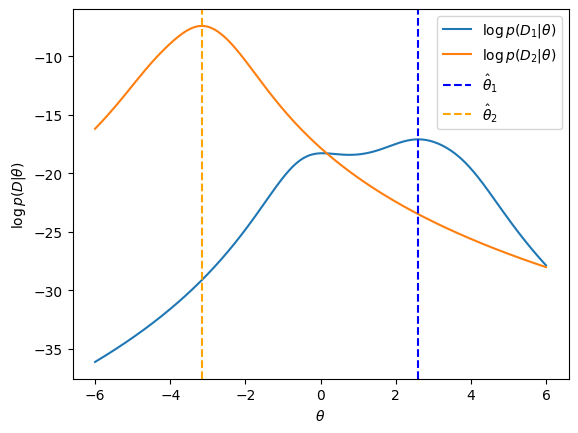

In [25]:
plt.plot(theta_values, [log_likelihood(D1, theta) for theta in theta_values], label=r'$\log p(D_1|\theta)$')
plt.plot(theta_values, [log_likelihood(D2, theta) for theta in theta_values], label=r'$\log p(D_2|\theta)$')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='orange', linestyle='--', label=r'$\hat{\theta}_2$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p(D|\theta)$')
plt.legend()
plt.show()

## Α2

We will first calculate the a-priori probabilities for each class. We have 7 samples in class $\omega_1$ and 5 samples in class $\omega_2$ (12 total), so the a-priori probabilities are calculated as:

In [26]:
apriori_P1 = len(D1) / (len(D1) + len(D2))
apriori_P2 = len(D2) / (len(D1) + len(D2))

We can now define the discriminant function as: $$g(x) = \log{P(x|\hat{\theta}_1}) - \log{P(x|\hat{\theta}_2}) + \log(P(\omega_1)) - \log(P(\omega_2))$$

In [27]:
def predict (D, apriori_P1, apriori_P2, theta1, theta2):
    return np.log(pdf(D, theta1)) - np.log(pdf(D, theta2)) + np.log(apriori_P1) - np.log(apriori_P2)

We can now calculate all of the $g$ values and plot them. The decision boundary is $g(x) = 0$ 

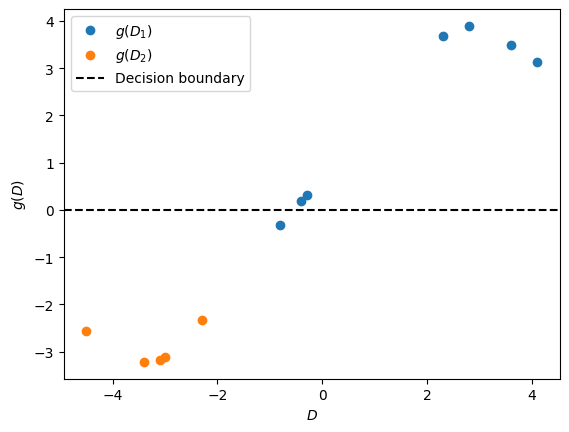

In [35]:
g_values_D1 = predict(D1, apriori_P1, apriori_P2, theta_hat_1, theta_hat_2)
g_values_D2 = predict(D2, apriori_P1, apriori_P2, theta_hat_1, theta_hat_2)

plt.plot(D1, g_values_D1, 'o', label=r'$g(D_1)$')
plt.plot(D2, g_values_D2, 'o', label=r'$g(D_2)$')
plt.axhline(0, color='black', linestyle='--', label='Decision boundary')
plt.xlabel(r'$D$')
plt.ylabel(r'$g(D)$')
plt.legend()
plt.show()

### Observations and conclusions

For the classification to be correct we need to:
- Assign $x$ in class $\omega_1$ (no stress) if $g(x) > 0$
- Assign $x$ in class $\omega_2$ (stress) if $g(x) < 0$

while the decision boundary is $g(x) = 0$.

We can clearly see that the classification is fairly accurate, since $11$ out of $12$ points are classified correctly. Only one point from class $\omega_1$ is not classified correctly.

We could try to change the discriminant function so it achieves perfect classification of our samples, but this might lead to **overfitting** which is not desirable since the model might not generalize well and thus perform poorly on different sample data.

